# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.express as px
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module: Applied Statistics/DS501 Mid Course Summative Assignment/Superstore Marketing Data - Sheet1.csv')

In [4]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# dataset column wise null values sum()
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.nunique().sort_values(ascending=False)

In [ ]:
# Check Unique Values for each colunms.
print(df.apply(lambda col: col.unique()))

Id                     [1826, 1, 10476, 1386, 5371, 7348, 4073, 1991,...
Year_Birth             [1970, 1961, 1958, 1967, 1989, 1954, 1947, 197...
Education                     [Graduation, PhD, 2n Cycle, Master, Basic]
Marital_Status         [Divorced, Single, Married, Together, Widow, Y...
Income                 [84835.0, 57091.0, 67267.0, 32474.0, 21474.0, ...
Kidhome                                                        [0, 1, 2]
Teenhome                                                       [0, 1, 2]
Dt_Customer            [6/16/2014, 6/15/2014, 5/13/2014, ########, 3/...
Recency                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
MntWines               [189, 464, 134, 10, 6, 336, 769, 78, 384, 450,...
MntFruits              [104, 5, 11, 0, 16, 130, 80, 26, 4, 82, 10, 6,...
MntMeatProducts        [379, 64, 59, 1, 24, 411, 252, 11, 102, 535, 6...
MntFishProducts        [111, 7, 15, 0, 11, 240, 21, 73, 80, 3, 2, 13,...
MntSweetProducts       [189, 0, 2, 32, 34, 98, 13, 

In [8]:
# Copy Dataset
sp_df = df.copy()

In [9]:
# counting Dt_customer missing date
dt_customer = sp_df['Dt_Customer'] == '########'
dt_customer.sum()

916

In [10]:
# Dt_Customer column in missing date to replace np.num values
sp_df['Dt_Customer'].replace('########',np.nan,inplace=True)

In [11]:
# Check total null/missing values
sp_df.isnull().sum().sort_values(ascending=False)

,0
Dt_Customer,916
Income,24
Id,0
MntFishProducts,0
Response,0
NumWebVisitsMonth,0
NumStorePurchases,0
NumCatalogPurchases,0
NumWebPurchases,0
NumDealsPurchases,0


In [12]:
# percentage miss values
sp_df.isnull().sum().sort_values(ascending=False)/len(sp_df)*100

,0
Dt_Customer,40.892857
Income,1.071429
Id,0.000000
MntFishProducts,0.000000
Response,0.000000
NumWebVisitsMonth,0.000000
NumStorePurchases,0.000000
NumCatalogPurchases,0.000000
NumWebPurchases,0.000000
NumDealsPurchases,0.000000


We can seen that the columns 'Dt_Customer' has **40%** missing data.so i will drop the columns.

In [13]:
# drop column dataset
sp_df.drop('Dt_Customer',axis=1,inplace=True)

We can seen that the column 'Income' has **1%** missing data.so I will be Fill with median values.

In [14]:
# Fill with median value
sp_df['Income'].fillna(sp_df['Income'].median(), inplace=True)

Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


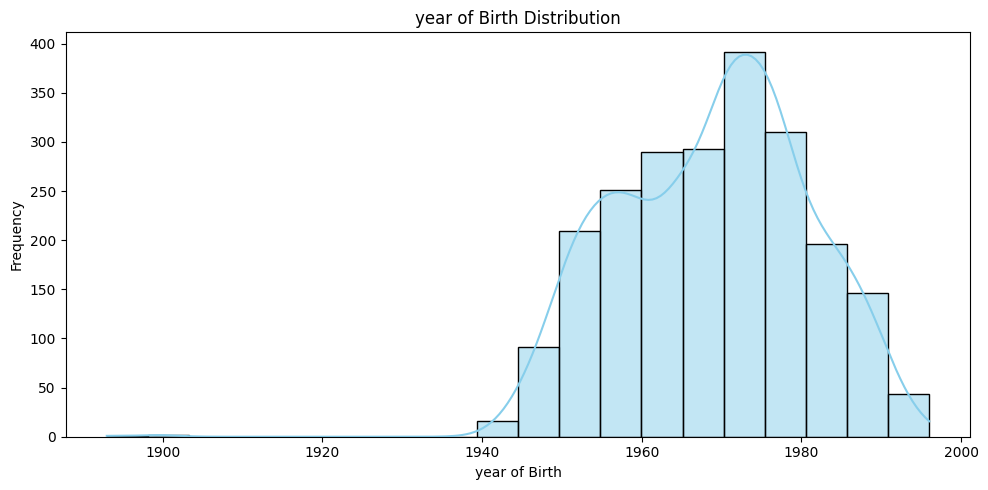

In [16]:
print(sp_df['Year_Birth'].describe())
# Visualization: Histogram
plt.figure(figsize=(10, 5))
sns.histplot(sp_df['Year_Birth'], kde=True, bins=20, color='skyblue')
plt.title('year of Birth Distribution')
plt.xlabel('year of Birth')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [18]:
# iqr method
q1 = sp_df.Year_Birth.quantile(0.25)
q3 = sp_df.Year_Birth.quantile(0.75)

iqr = q3-q1
iqr

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# outliers
sp_df[(sp_df.Year_Birth<lower) | (sp_df.Year_Birth>upper)][['Year_Birth']].head()

,Year_Birth
513,1893
827,1899
2233,1900


In [21]:
sp_df = sp_df[(sp_df.Year_Birth>lower) & (sp_df.Year_Birth<upper)]

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


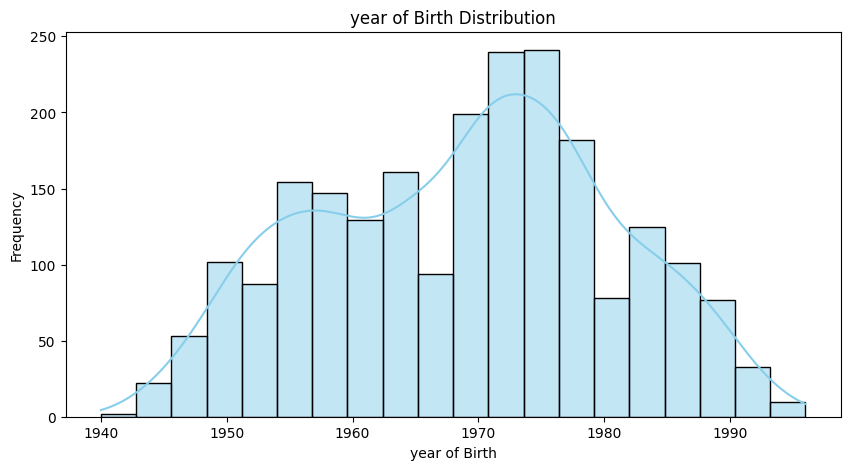

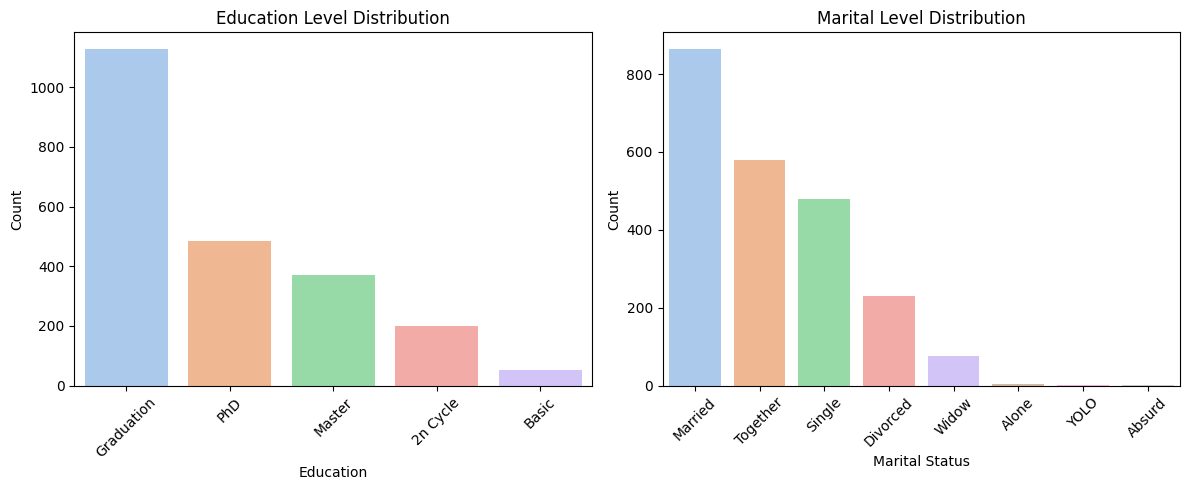

In [22]:
print(sp_df['Year_Birth'].describe())
# Visualization: Histogram
plt.figure(figsize=(10, 5))
sns.histplot(sp_df['Year_Birth'], kde=True, bins=20, color='skyblue')
plt.title('year of Birth Distribution')
plt.xlabel('year of Birth')
plt.ylabel('Frequency')
# Visualization: countplot Education
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Education', data=sp_df, palette='pastel', order=sp_df['Education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Visualization:Marital Level Distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Marital_Status', data=sp_df, palette='pastel', order=sp_df['Marital_Status'].value_counts().index)
plt.title('Marital Level Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


Descriptive statistics
The third step in identifying trends in consumer behavior is to use descriptive statistics. Descriptive statistics are numerical measures that describe the main features of your data, such as the mean, median, mode, standard deviation, range, frequency, or percentage. Descriptive statistics can help you understand the distribution, variability, and central tendency of your data, and compare different groups or categories. You can use descriptive statistics to summarize your data and highlight the key findings or differences.

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
sp_df.dtypes

,0
Id,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64


1. Central Tendency Measures :-
* Mean (average value)
* Median (middle value)
* Mode (most frequent value)
2. Measures of Dispersion :-
* Variance (spread of data)
* Standard Deviation (average deviation from mean)
* Range (difference between max and min)

In [ ]:
# Numerical variables - Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables.
numerical_variables =['Year_Birth','Income','Kidhome','Teenhome',
                      'MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds',
                      'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases','NumWebVisitsMonth']
# Calculating statistics for the numerical columns
calculate_measures = sp_df[numerical_variables].agg(['mean', 'median', 'std','var']).transpose()
calculate_measures

,mean,median,std,var
Year_Birth,1968.805804,1970.0,11.984069,1.436179e+02
Income,52237.975446,51381.5,25037.955891,6.268992e+08
Kidhome,0.444196,0.0,0.538398,2.898725e-01
Teenhome,0.506250,0.0,0.544538,2.965219e-01
MntFishProducts,37.525446,12.0,54.628979,2.984325e+03
MntMeatProducts,166.950000,67.0,225.715373,5.094743e+04
MntFruits,26.302232,8.0,39.773434,1.581926e+03
MntSweetProducts,27.062946,8.0,41.280498,1.704080e+03
MntWines,303.935714,173.5,336.597393,1.132978e+05
MntGoldProds,44.021875,24.0,52.167439,2.721442e+03


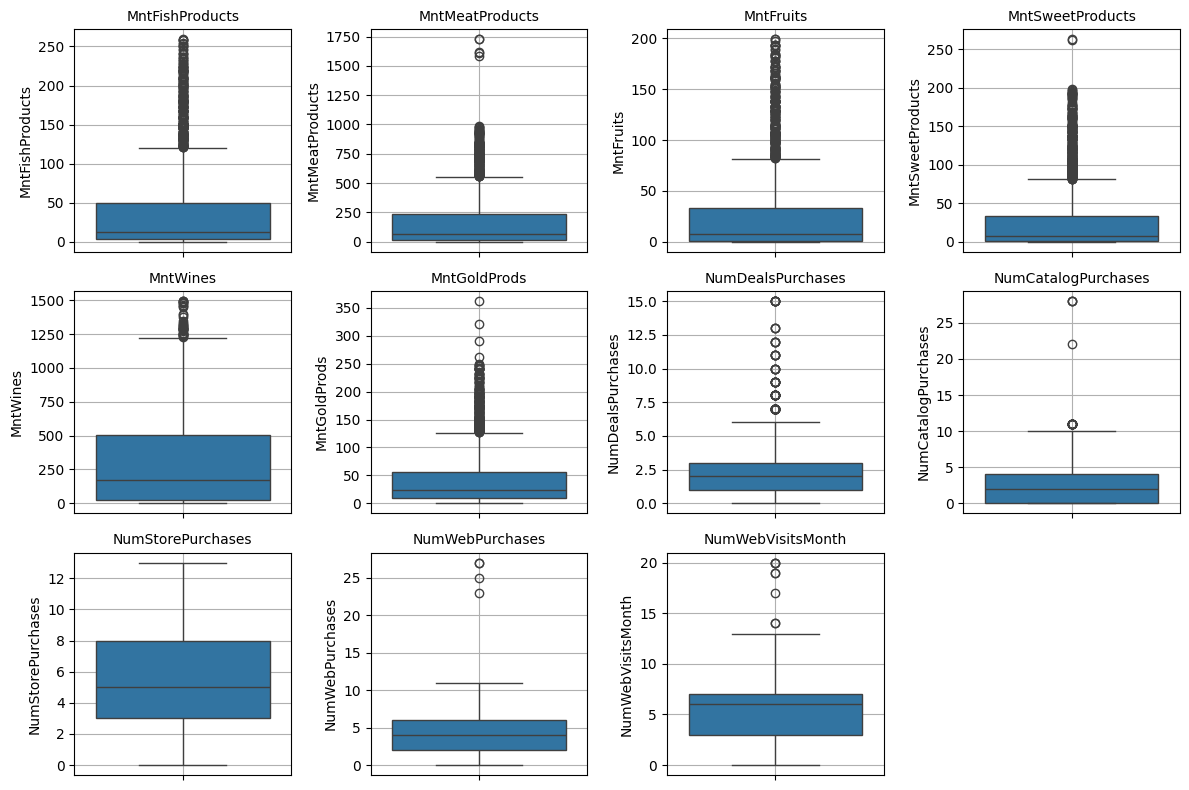

In [ ]:
# list of Numerical data
numerical_outliner =['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds',
                      'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases','NumWebVisitsMonth']

# create boxplot
plt.figure(figsize=(12,8))
#loop using list data boxplot show
for i ,col in enumerate(numerical_outliner,1):
  plt.subplot(3,4,i)
  sns.boxplot(sp_df[col])
  plt.title(col,fontsize = 10)
  plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Handle outliers
# Calculate the IQR for each numerical variable
def calculate_outliers(sp_df, column):
     # Calculate the 25th percentile (Q1) and 75th percentile (Q3)
    Q1 = sp_df[column].quantile(0.25)
    Q3 = sp_df[column].quantile(0.75)
    IQR = Q3 - Q1 # Spread of the middle 50% of the data
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify values outside the bounds (outliers)
    sp_df.loc[sp_df[column] < lower_bound, column] = lower_bound
    sp_df.loc[sp_df[column] > upper_bound, column] = upper_bound

    # print(f"Outliers Column in {column}:")
    # print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")


# Apply calculate_outliers to all numerical columns
#For loop to detech and remove outliers
for col in numerical_outliner:
    calculate_outliers(sp_df, col)

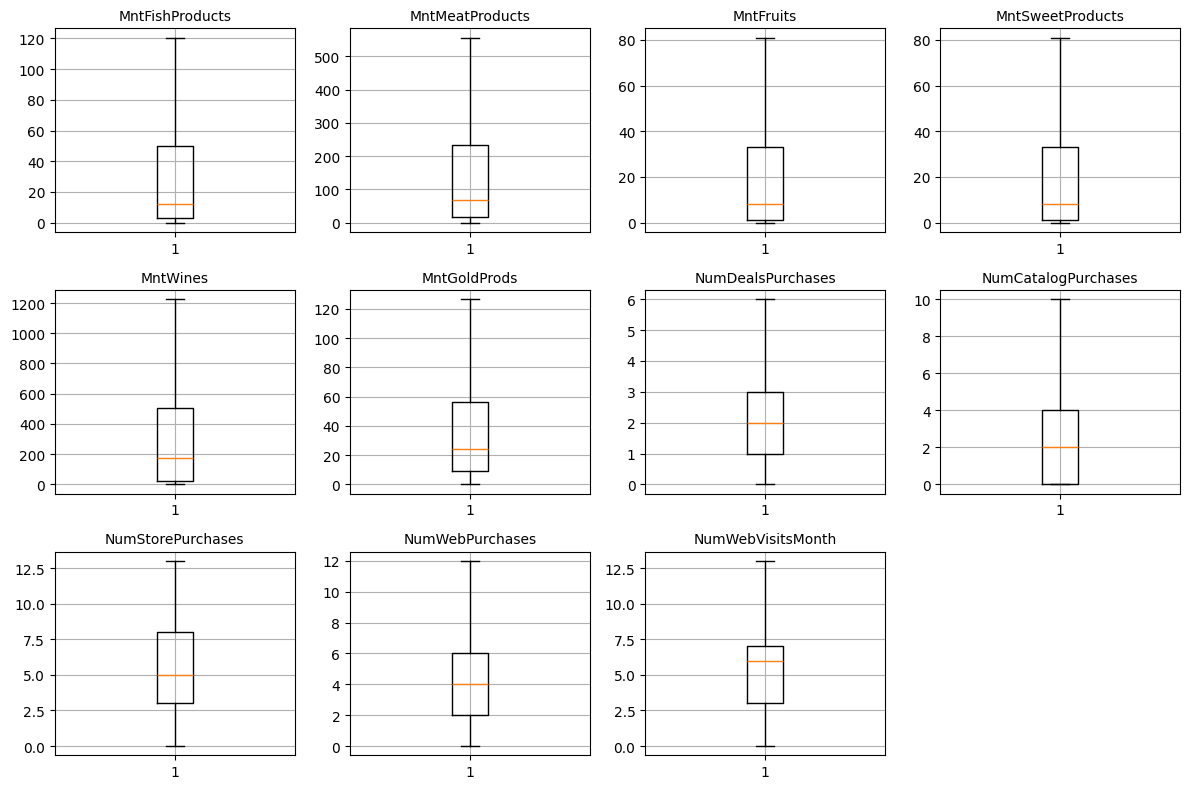

In [ ]:
# create boxplot
plt.figure(figsize=(12,8))
#loop using list data boxplot show
for i ,col in enumerate(numerical_outliner,1):
  plt.subplot(3,4,i)
  plt.boxplot(sp_df[col].dropna())
  plt.title(col,fontsize = 10)
  plt.grid(True)
plt.tight_layout()
plt.show()

### **Discriptive Statistics after handling outliers**

In [ ]:
# Numerical variables - Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables.
numerical_variables =['Year_Birth','Income','Kidhome','Teenhome',
                      'MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds',
                      'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases','NumWebVisitsMonth']
#Identify values
calculate_measures = sp_df[numerical_variables].agg(['mean', 'median', 'std','var']).transpose()
calculate_measures

,mean,median,std,var
Year_Birth,1968.805804,1970.0,11.984069,1.436179e+02
Income,52237.975446,51381.5,25037.955891,6.268992e+08
Kidhome,0.444196,0.0,0.538398,2.898725e-01
Teenhome,0.506250,0.0,0.544538,2.965219e-01
MntFishProducts,32.115848,12.0,40.361485,1.629049e+03
MntMeatProducts,150.873214,67.0,178.816658,3.197540e+04
MntFruits,21.679018,8.0,27.257348,7.429630e+02
MntSweetProducts,21.937946,8.0,27.540334,7.584700e+02
MntWines,302.112946,173.5,331.057356,1.095990e+05
MntGoldProds,39.487723,24.0,39.927508,1.594206e+03


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

Both Binomial and Bernoulli distributions deal with discrete random variables and represent scenarios where there are only two possible outcomes (e.g., success/failure, yes/no, heads/tails).

0 (failure): No response
1 (success): Response
Each outcome has a fixed probability, and the distribution is determined by a single parameter:
 * p, which represents the probability of success (Response = 1).




Probability of Response = 1 (success): 0.1491
Expected value (mean) for Response: 0.1491
Probability of Complain = 1 (success): 0.0094
Expected value (mean) for Complain: 0.0094


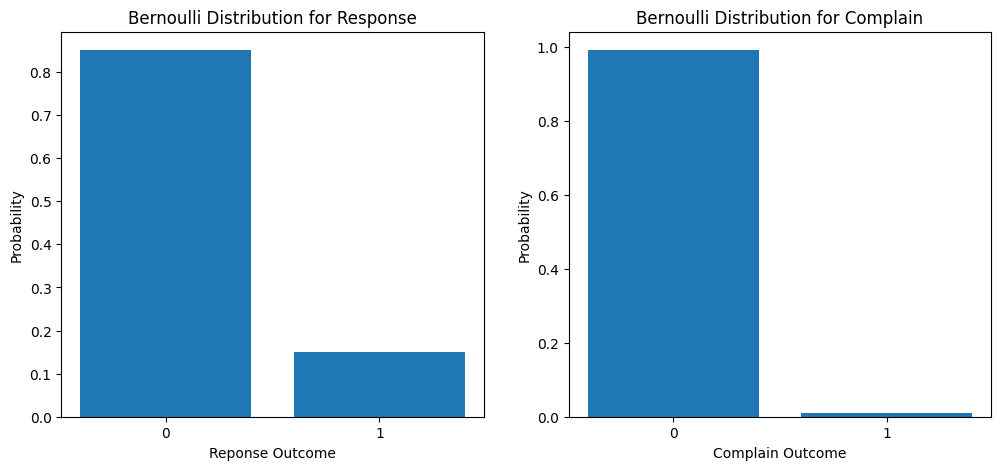

In [ ]:
#'Response' is a binary variable (0: No response, 1: Response)
from scipy.stats import bernoulli

# Probability of success use mean  Response
prob_response = sp_df['Response'].mean()
# Probability Mass Function (PMF) for Bernoulli distribution (probability of success = prob_response)
prob_success = stats.bernoulli.pmf(1, prob_response)
print(f"Probability of Response = 1 (success): {prob_success:.4f}")

# Expected value (mean) for a Bernoulli distribution
expected_value = stats.bernoulli.mean(prob_response)
print(f"Expected value (mean) for Response: {expected_value:.4f}")

# Probability of success use mean  compain
prob_complain = sp_df['Complain'].mean()
# Probability Mass Function (PMF) for Bernoulli distribution (probability of success = prob_complain)
prob_success_complain = stats.bernoulli.pmf(1, prob_complain)
print(f"Probability of Complain = 1 (success): {prob_success_complain:.4f}")
expected_value_complain = stats.bernoulli.mean(prob_complain)
print(f"Expected value (mean) for Complain: {expected_value_complain:.4f}")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
# Visualizing the Bernoulli Distribution
x = [0, 1]  # Two possible outcomes Reponse: 0 ( No response), 1 (response)
pmf = bernoulli.pmf(x, prob_response)  # Calculate PMF
plt.bar(x, pmf)
plt.xticks([0, 1])
plt.xlabel("Reponse Outcome")
plt.ylabel("Probability")
plt.title(f"Bernoulli Distribution for Response")

plt.subplot(1, 2, 2)
x = [0, 1]  # Two possible outcomes Complain: 0 ( No Complain), 1 (Complain)
pmf = bernoulli.pmf(x, prob_complain)  # Calculate PMF
plt.bar(x, pmf)
plt.xticks([0, 1])
plt.xlabel("Complain Outcome")
plt.ylabel("Probability")
plt.title(f"Bernoulli Distribution for Complain")
plt.show()


The Expected Value (Mean) of the normal distribution

Parameters: mu = mean, sigma = std deviation (estimated from the data)
Expected Value:
* E(X)=μ

Probability Calculation:
* calculate the probability that spending (MntWines) is less than 100.

Cumulative Distribution Function (CDF)
Probability of a value being **less than or equal to 100 using the**








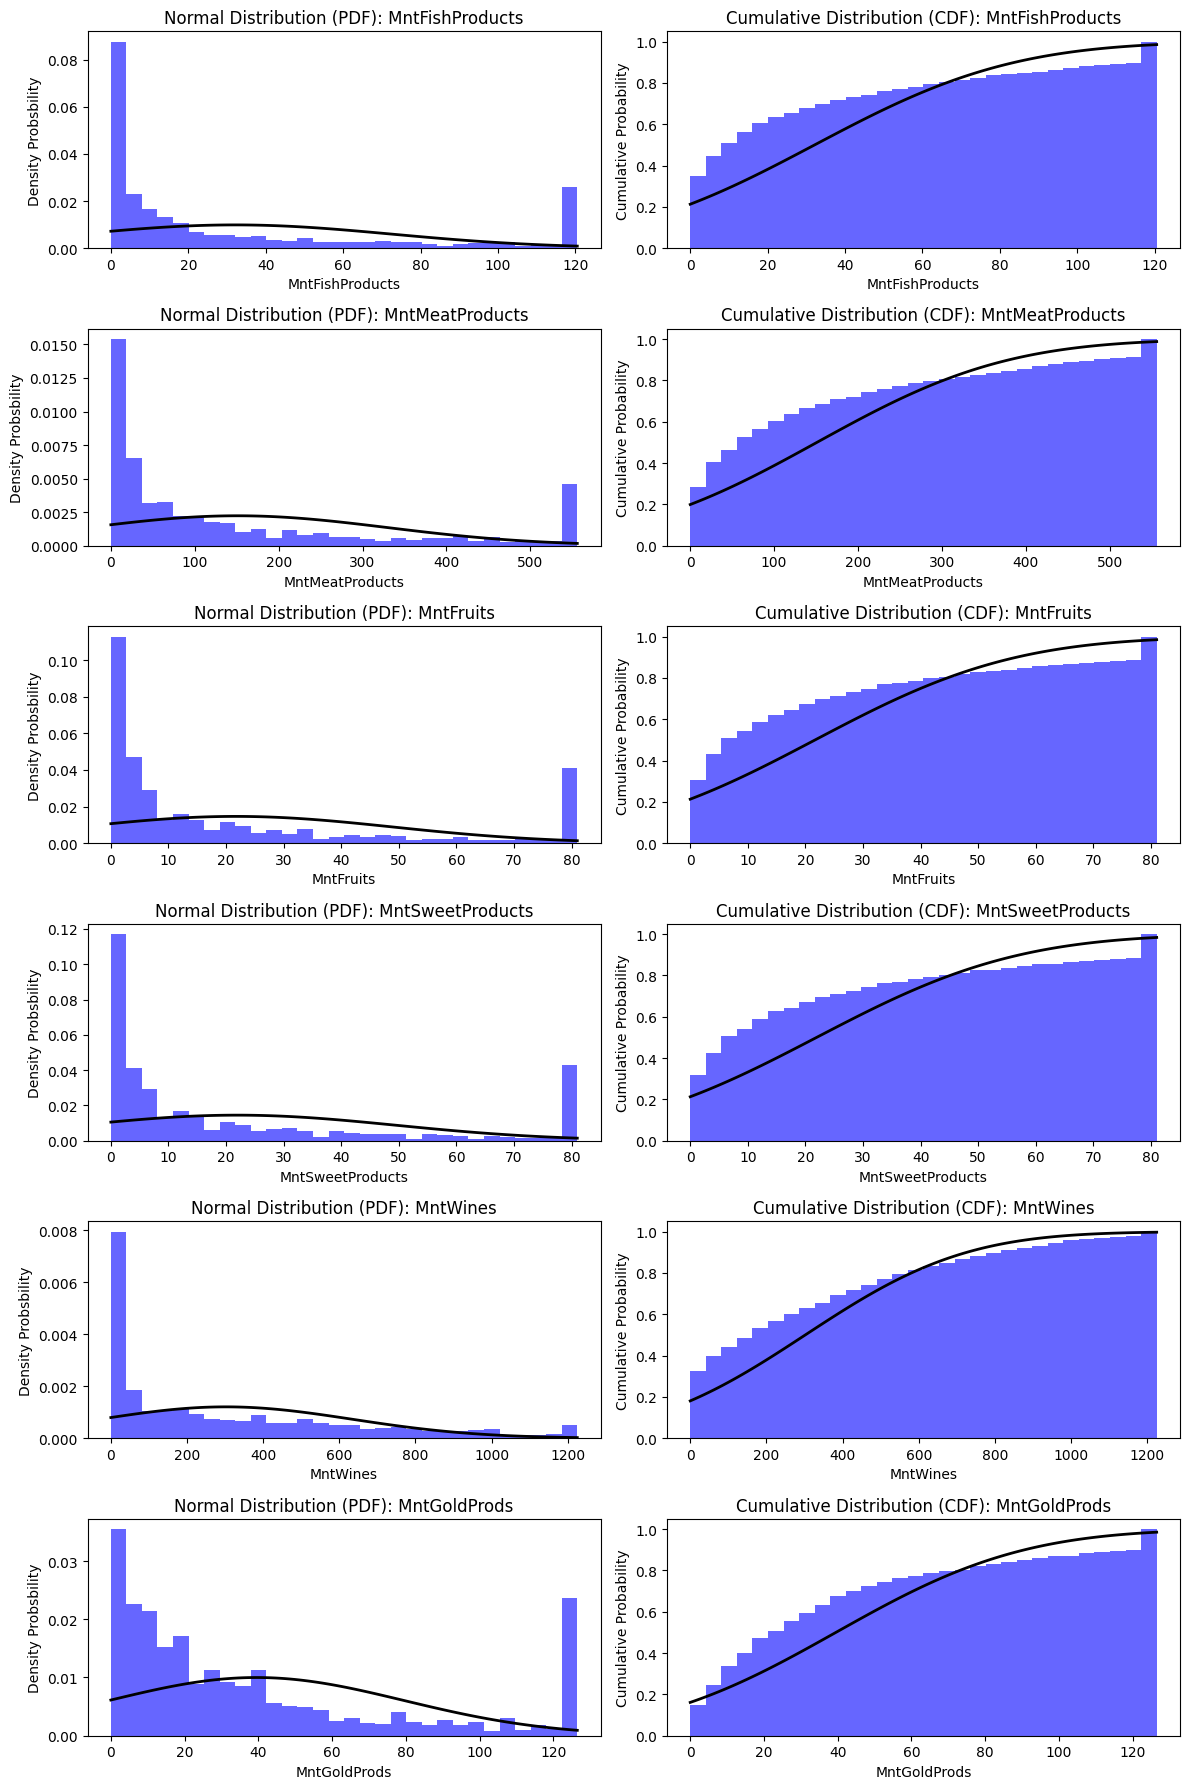

                  Mean (mu)  Std Dev (sigma)  P(X ≤ 100)  Expected Value
MntFishProducts       32.12            40.35      0.9537         32.1158
MntMeatProducts      150.87           178.78      0.3880        150.8732
MntFruits             21.68            27.25      0.9980         21.6790
MntSweetProducts      21.94            27.53      0.9977         21.9379
MntWines             302.11           330.98      0.2707        302.1129
MntGoldProds          39.49            39.92      0.9352         39.4877


In [ ]:
from scipy.stats import norm
#Spending data
numerical_variables_list =['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds']

# Dictionary to store results
results = {}

# Figure for visualization
# plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(len(numerical_variables_list), 2, figsize=(12, 3 * len(numerical_variables_list)))

for i,column in enumerate(numerical_variables_list):

  #check Columns wise Remove null values
  data = sp_df[column].dropna()

  # Fit a normal distribution to the data
  mu, sigma = norm.fit(data)  # Calculate the mean (mu) and standard deviation (sigma)

  #The mean (mu) represents the center of the distribution.
  #print(f"Mean (mu): {mu:.2f}")
  #The standard deviation (sigma) represents the spread (width) of the distribution.

  # Create a range of values for the normal distribution curve
  x = np.linspace(min(data), max(data),100)
  #print(f"min-max{min(data), max(data)}")

  # Calculate probabilities CDF P(X<=100)
  cdf= stats.norm.cdf(x, mu, sigma)

  #Probability of spending less than or equal to 100
  proba_100= stats.norm.cdf(100, mu, sigma)


  #expected mean value using the normal distribution.
  expected_value_norm = stats.norm.mean(mu)


  # Store results
  results[column] = {
        "Mean (mu)": round(mu, 2),
        "Std Dev (sigma)": round(sigma, 2),
        "P(X ≤ 100)": round(proba_100, 4),
        "Expected Value": round(expected_value_norm, 4)
    }


  # Histogram (visualize the distribution of the data)
  axes[i, 0].hist(data, bins=30, density=True, alpha=0.6, color='b')
  axes[i, 0].plot(x, stats.norm.pdf(x, mu, sigma), 'k', linewidth=2)
  axes[i, 0].set_title(f'Normal Distribution (PDF): {column}')
  axes[i, 0].set_xlabel(column)
  axes[i, 0].set_ylabel('Density Probsbility')

  #Plot the CDF
  axes[i, 1].hist(data, bins=30, density=True, cumulative=True, alpha=0.6, color='b')
  axes[i, 1].plot(x, stats.norm.cdf(x, mu, sigma), 'k', linewidth=2)
  axes[i, 1].set_title(f'Cumulative Distribution (CDF): {column}')
  axes[i, 1].set_xlabel(column)
  axes[i, 1].set_ylabel('Cumulative Probability')
# Show both plots
plt.tight_layout()
plt.show()

# Display results table view
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)



## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [ ]:
sp_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'],
      dtype='object')

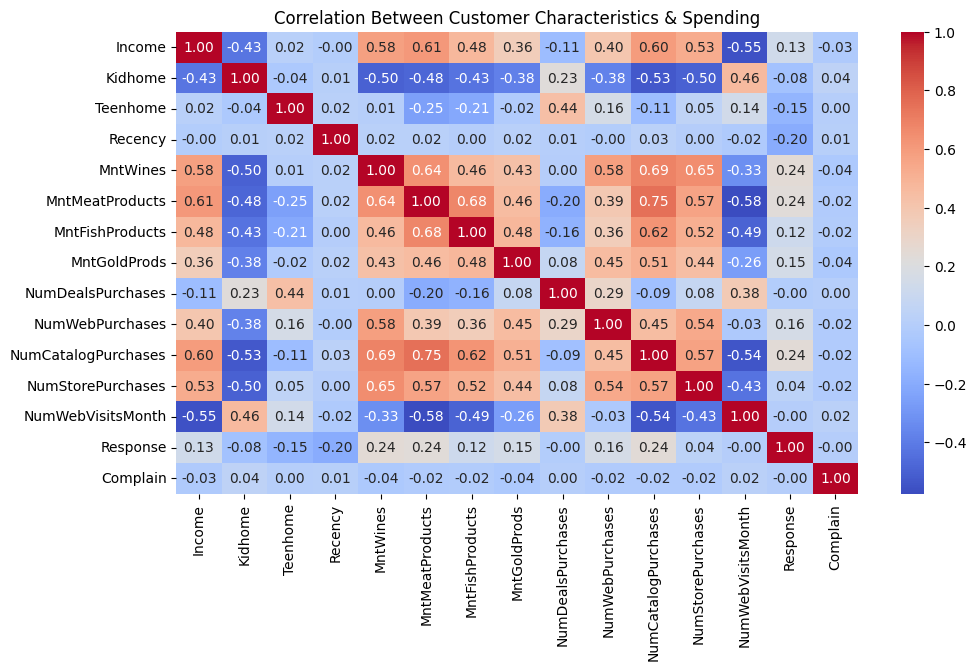

In [ ]:
# Select numerical features
columns_to_relation = ['Income','Kidhome','Teenhome', 'Recency','MntWines', 'MntMeatProducts',
      'MntFishProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain']
corr_matrix = sp_df[columns_to_relation].corr()

# Plot heatmap of correlations
plt.figure(figsize=(11, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Customer Characteristics & Spending")
plt.show()

## Key insights regarding relationships between variables

There is a positive correlation between income and spending on meat, wine, and fish products.Higher-income customers amount spent and purchasing behaviors catalog,store and web customer purchase.

There is a positive correlation between Kidhome, Teenhome and discount product.Yunger and kids higher household customer perfer a discount product purchasing.

Seasonal and festival discounts drive higher sales among households with children and teenagers.

There is a nagetive correlation between customer website vist per month and website purchasing.Many customer vist website per month high, but compere to lower customer purchasing.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

### Total spending per product category Customer

In [ ]:
# Calculate total spending per product category
product_spending = sp_df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Convert the data to a DataFrame for Plotly
df = product_spending.reset_index()
df.columns = ['Category', 'Spending']# product name and product vaules text label

# Create a pie chart using Plotly Express
fig = px.pie(df,
             names='Category',
             values='Spending',
             title='Total Spending per Product Category',
             color_discrete_sequence=px.colors.sequential.BuGn)  # Changed to 'Blues'

# Center the title & set figure size
fig.update_layout(title={'x': 0.5, 'xanchor': 'center'},
                  width=700, height=500)  # Adjust width & height as needed

# Display the figure
fig.show()

Insights from the Visual

*   Top Spending category like a MntWines dominates spending, it indicates customer preference for that product.
*   Low Spending categories like MntGoldProds or MntSweetProducts have the lowest spending, they may not appeal to the target customers.Offer discounts,festive seasons, bundles, or limited-time promotions to boost sales.

 ✔ Analyze seasonal trends to optimize inventory & marketing.

 ✔ Personalize offers & recommendations to improve customer engagement.



### Compares the distribution of online (Web) vs. in-store purchases

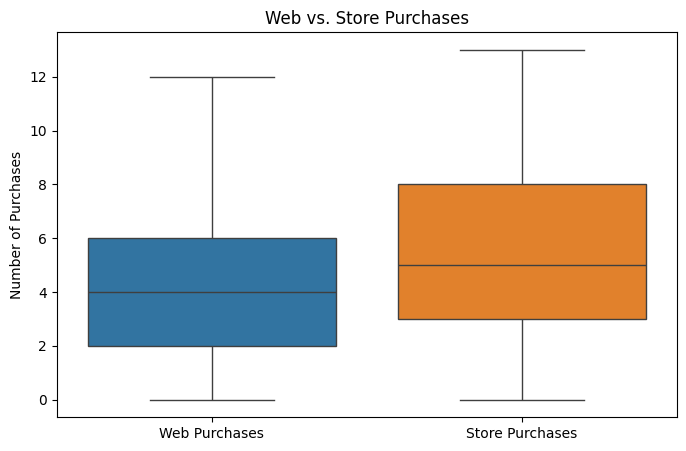

In [ ]:
# Online vs. In-Store Purchases
plt.figure(figsize=(8, 5))
sns.boxplot(data=sp_df[['NumWebPurchases', 'NumStorePurchases']])
plt.title("Web vs. Store Purchases")
plt.ylabel("Number of Purchases")
plt.xticks(ticks=[0, 1], labels=['Web Purchases', 'Store Purchases'])
plt.show()


Insights from the Visual

*   The NumStorePurchases is higher than NumWebPurchases, suggesting that customers make more in-store purchases than online purchases.
*   Invest more in e-commerce, online promotions, and digital marketing if online purchases dominate and Identify and target these loyal online customers with special VIP deals or early access to new products.
*   Encourage customers who shop in-store to also buy online by offering cross-channel discounts (e.g., buy in-store, get an online coupon).




### Average Income by Marital Status & Education

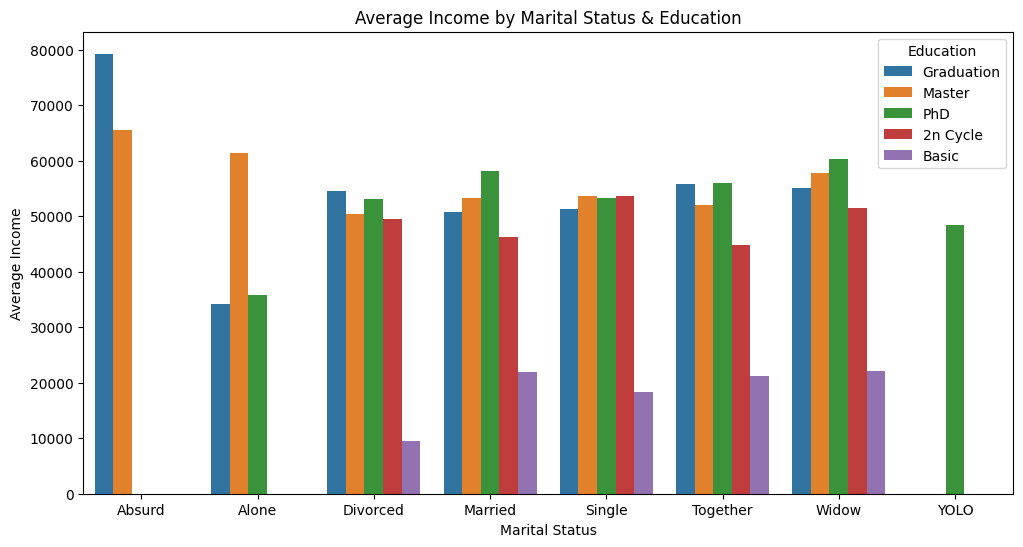

In [ ]:
avg_income_by_marital_education = sp_df.groupby(['Marital_Status','Education'])['Income'].mean().reset_index()
# Visual data
plt.figure(figsize=(12, 6))
#Avg income by marital_status & Education speding customer behavior
sns.barplot(data=avg_income_by_marital_education, x='Marital_Status', y='Income', hue='Education')
plt.title('Average Income by Marital Status & Education')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.show()

### Insights from the Visual

This chart analyzes how marital status and education level influence average income, helping businesses understand customer spending behavior and target their marketing efforts.

Single and divorced individuals tend to have lower average incomes compared to married or partnered individuals.
Widowed individuals generally have lower incomes, likely due to retirement or a lack of dual-income support.

* Target high-income, highly educated customers with premium products or exclusive membership programs.

* Offer personalized marketing for this segment with luxury or high-value product recommendations.

*   High-income, high-education customers: Advertise premium brands & exclusive memberships.
*  Lower-income, lower-education customers: Focus on discount-driven promotions, EMI plans, and essential products.
* Middle-income customers: Offer bundled discounts and referral programs.
* Targeted promotions based on education and marital status can optimize marketing strategies.




### Product by Reponse Status

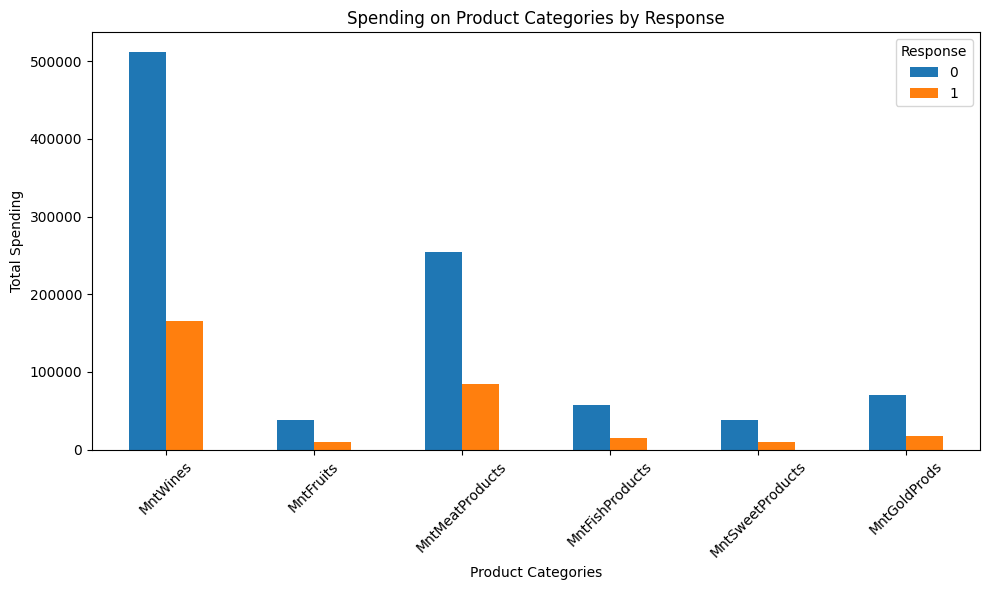

In [ ]:
# Which type product by high response status

# Group data by Response by calculate the sum of spending on each product category
spending_by_family = sp_df.groupby(['Response'])[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Plotting spending habits for different family types
spending_by_family.T.plot(kind='bar', figsize=(10, 6))
plt.title('Spending on Product Categories by Response')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.tight_layout()
plt.show()


### Insights from the Visual

This is chart observations in Majority of customers did not accept the offer, as shown by the higher bar heights across all product categories for this group.Fruits, Fish, and Sweet Products have the lowest spending, regardless of response status.

 ✔ Improve marketing strategies to increase response rates.

 ✔ Focus on high-response products like a wines, Meat for premium
   promotions.

 ✔ Reassess strategy for low-interest products like a Fruits, Fish, Sweets.

 ✔ Leverage customer segmentation to offer personalized deals.

✔ majority of customers did not respond, try personalized offers or limited-time discounts to encourage them to engage in future campaigns.

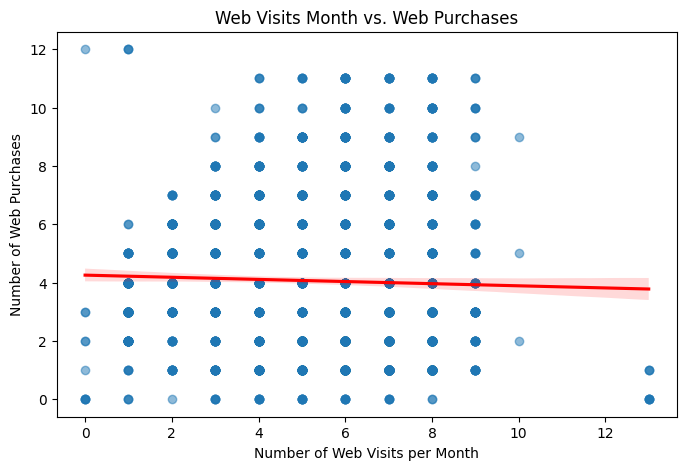

In [ ]:
# Web Purchases vs. Web Visits - Shopping Behavior Analysis

# Scatter plot to show relation between Web Purchases & Web Visits
plt.figure(figsize=(8, 5))
sns.regplot(data=sp_df, x='NumWebVisitsMonth', y='NumWebPurchases', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title("Web Visits Month vs. Web Purchases")
plt.xlabel("Number of Web Visits per Month")
plt.ylabel("Number of Web Purchases")
plt.show()

In [ ]:
sp_df[['NumWebPurchases','NumWebVisitsMonth']].describe()

### Insights from the Visual

The scatter plot shows that Many data points in the higher web visits range have low purchase counts.many customers have high web visits but low purchases, they may be price-sensitive, researching products, or hesitant buyers.

✔ Improve website experience to convert visitors into buyers.

✔ Use retargeting ads & email reminders for frequent visitors who haven’t purchased.

✔ Create loyalty programs for frequent buyers.

✔ Offer incentives for hesitant shoppers to improve conversion rates.

## **Conclusion**


The dataset analysis has uncovered valuable insights into customer behavior, spending patterns, and the relationship between various factors such as income, discounts, and purchase channels. These findings provide a strong foundation for optimizing marketing strategies, improving customer engagement, and increasing offer acceptance rates.

To maximize impact, continual monitoring of customer responses, feedback, and evolving market trends is essential. By maintaining a data-driven, customer-centric approach, the company can refine its strategies, enhance personalization, and build long-term customer loyalty.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

**Created by :- Dharmesh Gadhiya**

**Email     :- dharmeshgadhiya161@gmail.com**